<a href="https://colab.research.google.com/github/arafMustavi/SPitch/blob/main/AudioToText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transcribe

[ Following the tutorial : https://realpython.com/python-speech-recognition/ ]

Dataset for Speech Recognition : 

[http://www.voiptroubleshooter.com/open_speech/index.html]

Speech Recognition | Library Installation

In [1]:
!pip install SpeechRecognition

Import and Version Check

In [2]:
import speech_recognition as sr
sr.__version__

'3.8.1'

## Recognizer Instance

Each Recognizer instance has seven methods for recognizing speech from an audio source using various APIs. These are:

- recognize_bing(): Microsoft Bing Speech

- recognize_google(): Google Web Speech API

- recognize_google_cloud(): Google Cloud Speech - requires installation of the
google-cloud-speech package

- recognize_houndify(): Houndify by SoundHound

- recognize_ibm(): IBM Speech to Text

- recognize_sphinx(): CMU Sphinx - requires installing PocketSphinx

- recognize_wit(): Wit.ai

of the seven, only recognize_sphinx() works offline with the CMU Sphinx engine. The other six all require an internet connection.

In [3]:
recog = sr.Recognizer()

Supported File Types

Currently, SpeechRecognition supports the following file formats:

- WAV: must be in PCM/LPCM format

- AIFF

- AIFF-C

- FLAC: must be native FLAC format; OGG-FLAC is not supported

In [4]:
#  WILL Throw and Error

# recog.recognize_google()

# How could something be recognized from nothing?

# Using record() to Capture Data From a File

Type the following into your interpreter session to process the contents of the “harvard.wav” file:

In [5]:
inputAudio = sr.AudioFile('OSR_us_000_0010_8k.wav')
with inputAudio as source:
    audio = recog.record(source)

In [6]:
type(audio)

speech_recognition.AudioData

In [7]:
recog.recognize_google(audio)

"Burke's canoe slid on the smooth planks glue the sea to a dark blue background it is easy to tell the depth of a well these day the chicken leg of a variegated rice is often served in Randall's the juice of lemons makes fine punch the boxes on the side the pump truck the ha grimstead top corn and garbage 4 hours of City Works in a large cell"

# **Congratulations! You’ve just transcribed your first audio file!**


Capturing Segments With offset and duration

What if you only want to capture a portion of the speech in a file? The record() method accepts a duration keyword argument that stops the recording after a specified number of seconds.

For example, the following captures any speech in the first four seconds of the file:

In [8]:
with inputAudio as source:
    audio = recog.record(source, duration=8)
recog.recognize_google(audio)

'Birch canoe slid on the smooth planks glue the sea to a dark blue background'

The record() method, when used inside a with block, always moves ahead in the file stream. This means that if you record once for four seconds and then record again for four seconds, the second time returns the four seconds of audio after the first four seconds.

In [9]:
with inputAudio as source:
    audio1 = recog.record(source, duration=8)
    audio2 = recog.record(source, duration=8)

print(recog.recognize_google(audio1))
print(recog.recognize_google(audio2))

Birch canoe slid on the smooth planks glue the sea to a dark blue background
need to tell the depth of a well with a very good price is often served in round


Notice that audio2 contains a portion of the third phrase in the file. When specifying a duration, the recording might stop mid-phrase—or even mid-word—which can hurt the accuracy of the transcription. More on this in a bit.

In addition to specifying a recording duration, the record() method can be given a specific starting point using the offset keyword argument. This value represents the number of seconds from the beginning of the file to ignore before starting to record.

To capture only the second phrase in the file, you could start with an offset of four seconds and record for, say, three seconds.

In [10]:
with inputAudio as source:
    audio = recog.record(source,offset=4, duration=3)
print(recog.recognize_google(audio))

gluta C to a dog food bag


# **Working With Microphones**

Installing PyAudio
The process for installing PyAudio will vary depending on your operating system.

In colab, you can install PyAudio with pip:

In [11]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip3 install pyaudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (202 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to 

# THE MIC ACTIVATION CODE FOR COLAB


In [17]:
# all imports
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream

In [18]:
import speech_recognition as sr
r = sr.Recognizer()
#  NEED TO ENABLE MIC TO USE THE FOLLOWING COMMAND
mic = sr.Microphone() 

OSError: ignored

In [16]:
sr.Microphone.list_microphone_names()

[]

Attempt 2 for MIC Activation

Following the Code [ https://ricardodeazambuja.com/deep_learning/2019/03/09/audio_and_video_google_colab/ ]

In [19]:
!pip install ffmpeg-python

In [20]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [26]:
# RUNNING THIS CODE BLOCK WILL RECORD THE AUDIO
recordedaudio, sr = get_audio()

In [27]:
import matplotlib.pyplot as plt

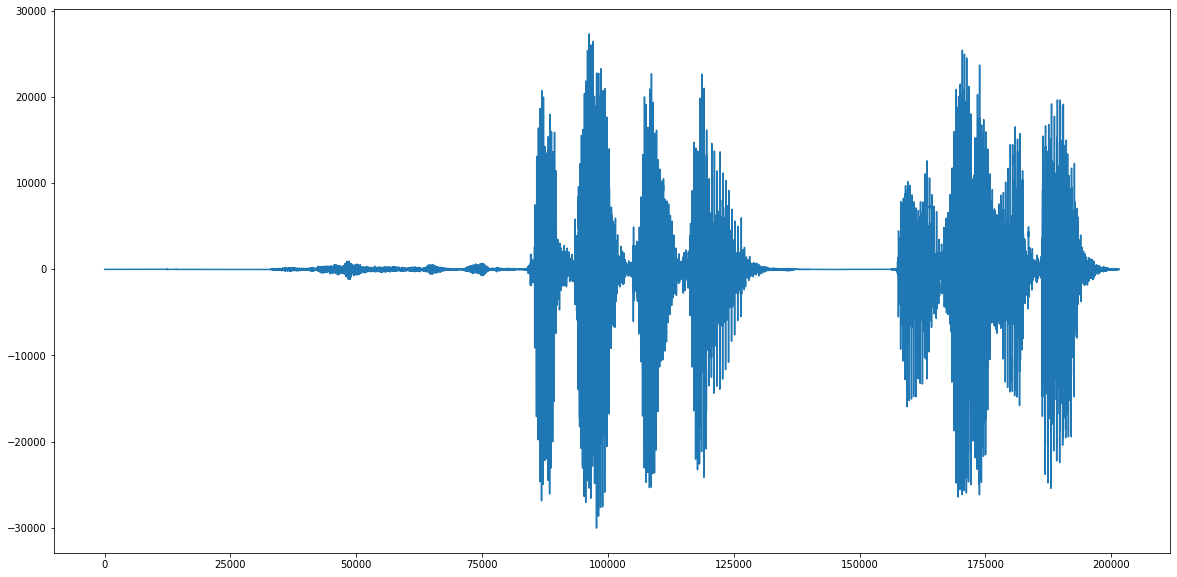

In [28]:
plt.figure(figsize=(20,10))
plt.plot(recordedaudio)
plt.show()

# **Congratulations! You have recorded the First Clip of your Life!**



# **Convert the Audio To Text**


Work Step :
- Save the recorded AUDIO into a wav file 
- Convert the WAV file to Text

[https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html ] 

In [34]:
type(recordedaudio)

numpy.ndarray

In [31]:
import speech_recognition as sr
sr.__version__

'3.8.1'

In [32]:
recog = sr.Recognizer()

In [37]:
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
# t = np.linspace(0., 1., samplerate)
# amplitude = np.iinfo(np.int16).max
# data = amplitude * np.sin(2. * np.pi * fs * t)
write("recordedSound.wav", samplerate, recordedaudio)

In [38]:

# inputAudio = sr.AudioFile('OSR_us_000_0010_8k.wav')
# inputAudio = recordedaudio
inputAudio = sr.AudioFile("recordedSound.wav")

with inputAudio as source:
    audio = recog.record(source)

In [39]:
recog.recognize_google(audio)

'okay thank you or you going with us'